# Classification of Epileptical Seizures from EEG signals using Deep Learning



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, LSTM, Dropout, AveragePooling3D

# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
X=df.values

In [4]:
X=X[:,1:-1]

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming 'df' is a DataFrame and 'y' is a column in 'df'
y = np.array(df['y'])
Y = to_categorical(y)  # Converts the labels to a one-hot encoded format

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Optional: Print shapes for verification
print(f"Y shape: {Y.shape}")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

Y shape: (11500, 6)
X_train shape: (9200, 178), X_test shape: (2300, 178)
Y_train shape: (9200, 6), Y_test shape: (2300, 6)


In [6]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

#  Intuition of the Epileptical Signal In the Dataset 

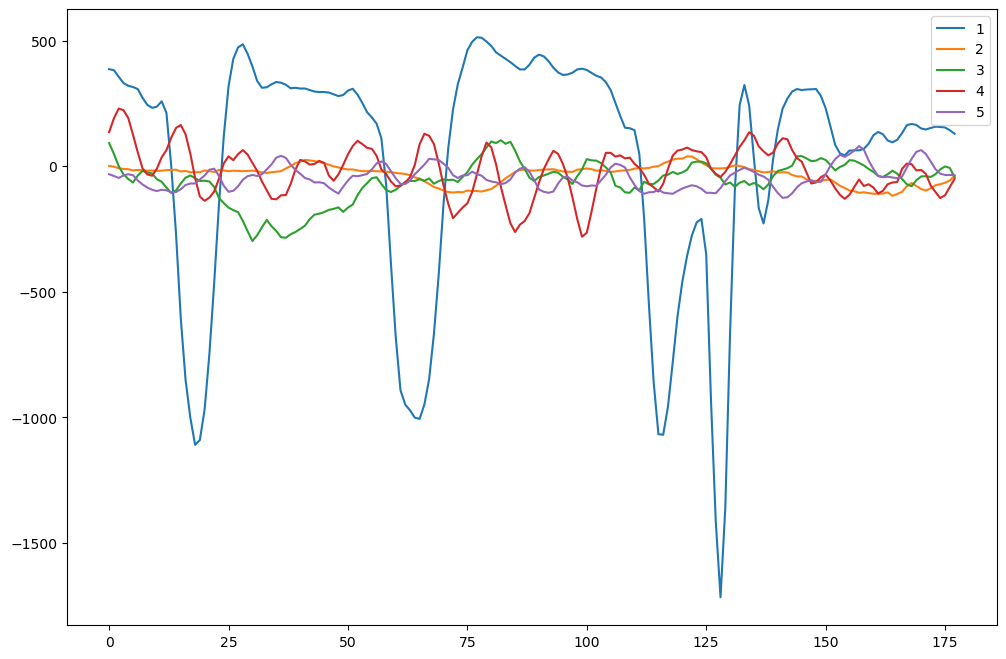

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating LSTM Neural Network For the Classification 

In [8]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 45, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 56)                25312     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 dense (Dense)               (None, 20)                1140      
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Standardize the training and testing data
X_train_standardized = ((X_train[:, ::4] - X_train.mean()) / X_train.std()).astype(np.float32)
X_test_standardized = ((X_test[:, ::4] - X_test.mean()) / X_test.std()).astype(np.float32)

# Train the model
hist = model.fit(
    X_train_standardized,
    Y_train[:, 1:],  # Adjusted label indexing
    validation_data=(X_test_standardized, Y_test[:, 1:]),
    epochs=100,
    batch_size=15,
    shuffle=False
)


Epoch 1/100
614/614 [==============================] - 112s 128ms/step - loss: 0.4232 - accuracy: 0.3762 - val_loss: 0.3903 - val_accuracy: 0.4587
Epoch 2/100
614/614 [==============================] - 75s 123ms/step - loss: 0.3822 - accuracy: 0.4399 - val_loss: 0.3797 - val_accuracy: 0.4491
Epoch 3/100
614/614 [==============================] - 68s 111ms/step - loss: 0.3698 - accuracy: 0.4722 - val_loss: 0.3496 - val_accuracy: 0.5170
Epoch 4/100
614/614 [==============================] - 53s 86ms/step - loss: 0.3371 - accuracy: 0.5412 - val_loss: 0.2894 - val_accuracy: 0.6243
Epoch 5/100
614/614 [==============================] - 43s 70ms/step - loss: 0.2836 - accuracy: 0.6207 - val_loss: 0.2571 - val_accuracy: 0.6730
Epoch 6/100
614/614 [==============================] - 40s 64ms/step - loss: 0.2533 - accuracy: 0.6637 - val_loss: 0.2424 - val_accuracy: 0.6870
Epoch 7/100
614/614 [==============================] - 41s 67ms/step - loss: 0.2456 - accuracy: 0.6746 - val_loss: 0.2400 - va

614/614 [==============================] - 22s 36ms/step - loss: 0.1572 - accuracy: 0.8066 - val_loss: 0.2264 - val_accuracy: 0.7430
Epoch 58/100
614/614 [==============================] - 19s 31ms/step - loss: 0.1544 - accuracy: 0.8110 - val_loss: 0.2240 - val_accuracy: 0.7526
Epoch 59/100
614/614 [==============================] - 18s 30ms/step - loss: 0.1574 - accuracy: 0.8091 - val_loss: 0.2263 - val_accuracy: 0.7439
Epoch 60/100
614/614 [==============================] - 20s 32ms/step - loss: 0.1513 - accuracy: 0.8171 - val_loss: 0.2287 - val_accuracy: 0.7439
Epoch 61/100
614/614 [==============================] - 20s 33ms/step - loss: 0.1487 - accuracy: 0.8185 - val_loss: 0.2258 - val_accuracy: 0.7430
Epoch 62/100
614/614 [==============================] - 19s 32ms/step - loss: 0.1476 - accuracy: 0.8195 - val_loss: 0.2301 - val_accuracy: 0.7539
Epoch 63/100
614/614 [==============================] - 21s 34ms/step - loss: 0.1475 - accuracy: 0.8220 - val_loss: 0.2331 - val_accuracy

# Saving The Trained Model

In [12]:
model.save('Epilepsy.h5')

D:\soft\conda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualisations

Graph Between Training Loss and Training Accuracy

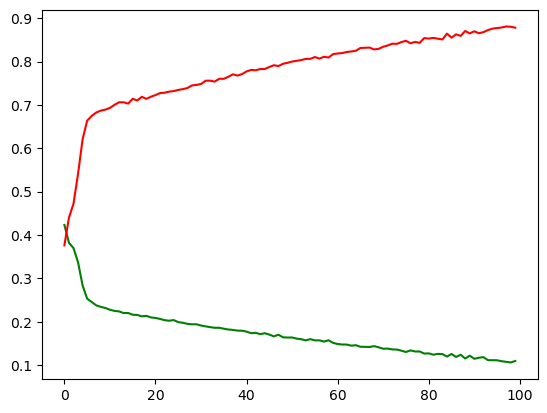

In [15]:
plt.figure(0)
plt.plot(hist.history['loss'], 'g')
plt.plot(hist.history['accuracy'], 'r')  # Use 'accuracy' instead of 'acc'
plt.show()


Graph Between Validation Loss Function and Validation Accuracy

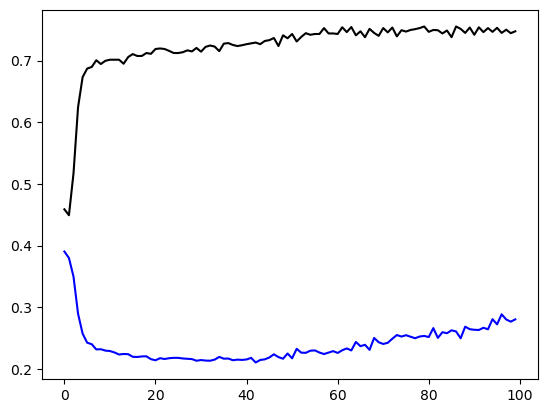

In [16]:
plt.figure(0)
plt.plot(hist.history['val_loss'], 'b')
plt.plot(hist.history['val_accuracy'], 'black')  # Use 'val_accuracy' instead of 'val_acc'
plt.show()
